web scraping.py: Initial csv creation for stat data(pts, gp, mp, awards).

In [94]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep

# --- 1) Analiz edilecek oyuncular ve Basketball-Reference slug'ları ---
players = {
    "Luka Doncic":         "d/doncilu01",
    "Stephen Curry":       "c/curryst01",
    "LeBron James":        "j/jamesle01",
    "Jayson Tatum":        "t/tatumja01",
    "Jalen Brunson":       "b/brunsja01",
    "Victor Wembanyama":   "w/wembavi01",
    "Anthony Edwards":     "e/edwaran01",
    "Ja Morant":           "m/moranja01",
    "Giannis Antetokounmpo":"a/antetgi01",
    "Devin Booker":        "b/bookede01",
    "Kevin Durant":        "d/duranke01",
    "James Harden":        "h/hardeja01",
    "Joel Embiid":         "e/embiijo01",
    "Kyrie Irving":        "i/irvinky01",
}

base_url = "https://www.basketball-reference.com/players/"

all_data = []

for name, slug in players.items():
    url = f"{base_url}{slug}.html"
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text, "html.parser")
    tbl = soup.find("table", id="per_game_stats")
    tbody = tbl.find("tbody")

    # 1) Tüm satırları (yıl, tr) olarak topla
    seasons = []
    for row in tbody.find_all("tr"):
        th = row.find("th", {"data-stat": "year_id"})
        if not th or not th.has_attr("csk"):
            continue
        year = int(th["csk"])
        seasons.append((year, row))

    # 2) En güncel 5 sezonu seç
    seasons = sorted(seasons, key=lambda yr_row: yr_row[0], reverse=True)[:5]

    # 3) Her sezonu işle
    for year, row in seasons:
        cols = row.find_all("td")
        gp  = cols[4].text.strip()      # games
        mpg = cols[6].text.strip()      # mp_per_g
        pts = cols[-2].text.strip()     # pts_per_g
        aw  = cols[-1].text.strip() or "No Awards"

        season_label = f"{year-1}-{str(year)[-2:]}"
        all_data.append({
            "Player": name,
            "Season": season_label,
            "Games Played": gp,
            "Minutes/Game": mpg,
            "Points/Game": pts,
            "Awards": aw
        })

    # siteye fazla yüklenmemek için kısa uyku
    sleep(1.0)

# 4) DataFrame oluştur ve CSV’ye kaydet
df = pd.DataFrame(all_data)
df = df.sort_values(["Player","Season"], ascending=[True,True])
df.to_csv("nba_top8_last5_by_player.csv", index=False)
print(df)


               Player   Season Games Played Minutes/Game Points/Game  \
31    Anthony Edwards  2020-21           72         32.1        19.3   
30    Anthony Edwards  2021-22           72         34.3        21.3   
29    Anthony Edwards  2022-23           79         36.0        24.6   
28    Anthony Edwards  2023-24           79         35.1        25.9   
27    Anthony Edwards  2024-25           79         36.3        27.6   
..                ...      ...          ...          ...         ...   
7       Stephen Curry  2022-23           56         34.7        29.4   
6       Stephen Curry  2023-24           74         32.7        26.4   
5       Stephen Curry  2024-25           70         32.2        24.5   
26  Victor Wembanyama  2023-24           71         29.7        21.4   
25  Victor Wembanyama  2024-25           46         33.2        24.3   

                  Awards  
31                 ROY-2  
30             No Awards  
29                    AS  
28  MVP-7,CPOY-8,AS,NBA2  


jersey_ranking.py: Code creates jersey_rank.csv for 5 year.

In [95]:
import pandas as pd

# 1) Sezon bazlı sıralamalarını bir dict içinde tanımlıyoruz
jersey_data = {
    '2024-2025': [
        'Luka Doncic',
        'Stephen Curry',
        'LeBron James',
        'Jayson Tatum',
        'Jalen Brunson',
        'Victor Wembanyama',
        'Anthony Edwards',
        'Ja Morant'
    ],
    '2023-2024': [
        'Stephen Curry',
        'Jayson Tatum',
        'LeBron James',
        'Victor Wembanyama',
        'Giannis Antetokounmpo',
        'Luka Doncic',
        'Devin Booker',
        'Kevin Durant'
    ],
    '2022-2023': [
        'LeBron James',
        'Stephen Curry',
        'Jayson Tatum',
        'Giannis Antetokounmpo',
        'Luka Doncic',
        'Kevin Durant',
        'Devin Booker',
        'Ja Morant'
    ],
    '2021-2022': [
        'LeBron James',
        'James Harden',
        'Stephen Curry',
        'Kevin Durant',
        'Jayson Tatum',
        'Joel Embiid',
        'Giannis Antetokounmpo',
        'Luka Doncic'
    ],
    '2020-2021': [
        'LeBron James',
        'Giannis Antetokounmpo',
        'Kevin Durant',
        'Luka Doncic',
        'Jayson Tatum',
        'Devin Booker',
        'Stephen Curry',
        'Kyrie Irving'
    ]
}

# 2) satır satır açıp 'Season', 'Rank', 'Player' sütunları olarak listeye ekliyoruz
rows = []
for season, players in jersey_data.items():
    for rank, player in enumerate(players, start=1):
        rows.append({
            'Season': season,
            'Rank': rank,
            'Player': player
        })

# 3) DataFrame'e dönüştür ve CSV'ye yaz
df = pd.DataFrame(rows)
df.to_csv('jersey_ranks.csv', index=False)

print("Oluşan CSV'nin ilk 10 satırı:")
print(df)


Oluşan CSV'nin ilk 10 satırı:
       Season  Rank                 Player
0   2024-2025     1            Luka Doncic
1   2024-2025     2          Stephen Curry
2   2024-2025     3           LeBron James
3   2024-2025     4           Jayson Tatum
4   2024-2025     5          Jalen Brunson
5   2024-2025     6      Victor Wembanyama
6   2024-2025     7        Anthony Edwards
7   2024-2025     8              Ja Morant
8   2023-2024     1          Stephen Curry
9   2023-2024     2           Jayson Tatum
10  2023-2024     3           LeBron James
11  2023-2024     4      Victor Wembanyama
12  2023-2024     5  Giannis Antetokounmpo
13  2023-2024     6            Luka Doncic
14  2023-2024     7           Devin Booker
15  2023-2024     8           Kevin Durant
16  2022-2023     1           LeBron James
17  2022-2023     2          Stephen Curry
18  2022-2023     3           Jayson Tatum
19  2022-2023     4  Giannis Antetokounmpo
20  2022-2023     5            Luka Doncic
21  2022-2023     6     

new_ordered_comparison.py: Utilizes the nba_top8_last5_by_player.csv file generated by web_scraping.py. It processes the "Awards" column by converting descriptive award strings into a numerical count of total awards received by each player for the corresponding season.

In [96]:
import pandas as pd

# 1) Load your raw per‐player file (with the original “Awards” column)
df = pd.read_csv('nba_top8_last5_by_player.csv')

# 2) Convert stat columns to numeric so we can sum/mean them
df['Games Played'] = pd.to_numeric(df['Games Played'],   errors='coerce')
df['Minutes/Game'] = pd.to_numeric(df['Minutes/Game'],    errors='coerce')
df['Points/Game']  = pd.to_numeric(df['Points/Game'],     errors='coerce')

# 3) Normalize the Awards column and build Award Count
df['Awards'] = df['Awards'].fillna('')  # replace NaN with empty string
# Treat any literal "No Awards" as empty
df.loc[df['Awards'].str.strip().str.lower() == 'no awards', 'Awards'] = ''

df['Award Count'] = (
    df['Awards']
      .str.split(',')
      .apply(lambda lst: sum(1 for award in lst if award.strip()))
)

# 4) Group by Season & Player, aggregating as requested
cleaned = (
    df
    .groupby(['Season','Player'], as_index=False)
    .agg({
        'Games Played': 'sum',    # sum games across multiple stints
        'Minutes/Game': 'mean',   # average minutes per game
        'Points/Game':  'mean',   # average points per game
        'Award Count':  'sum'     # total awards that season
    })
)

# 5) (Optional) sort for readability
cleaned = cleaned.sort_values(['Season','Games Played'], ascending=[True,False])

# 6) Write out the cleaned CSV
cleaned.to_csv('nba_top8_last5_cleaned_with_awards.csv', index=False)

# 7) Print a preview
print(cleaned)


     Season                 Player  Games Played  Minutes/Game  Points/Game  \
0   2020-21        Anthony Edwards            72     32.100000    19.300000   
4   2020-21          Jalen Brunson            68     25.000000    12.600000   
1   2020-21           Devin Booker            67     33.900000    25.600000   
5   2020-21           Jayson Tatum            64     35.800000    26.400000   
3   2020-21              Ja Morant            63     32.600000    19.100000   
8   2020-21          Stephen Curry            63     34.200000    32.000000   
2   2020-21  Giannis Antetokounmpo            61     33.000000    28.100000   
6   2020-21            Joel Embiid            51     31.100000    28.500000   
7   2020-21           LeBron James            45     33.400000    25.000000   
14  2021-22           James Harden           109     37.100000    22.250000   
13  2021-22          Jalen Brunson            79     31.900000    16.300000   
15  2021-22           Jayson Tatum            76    

pts_graph.py

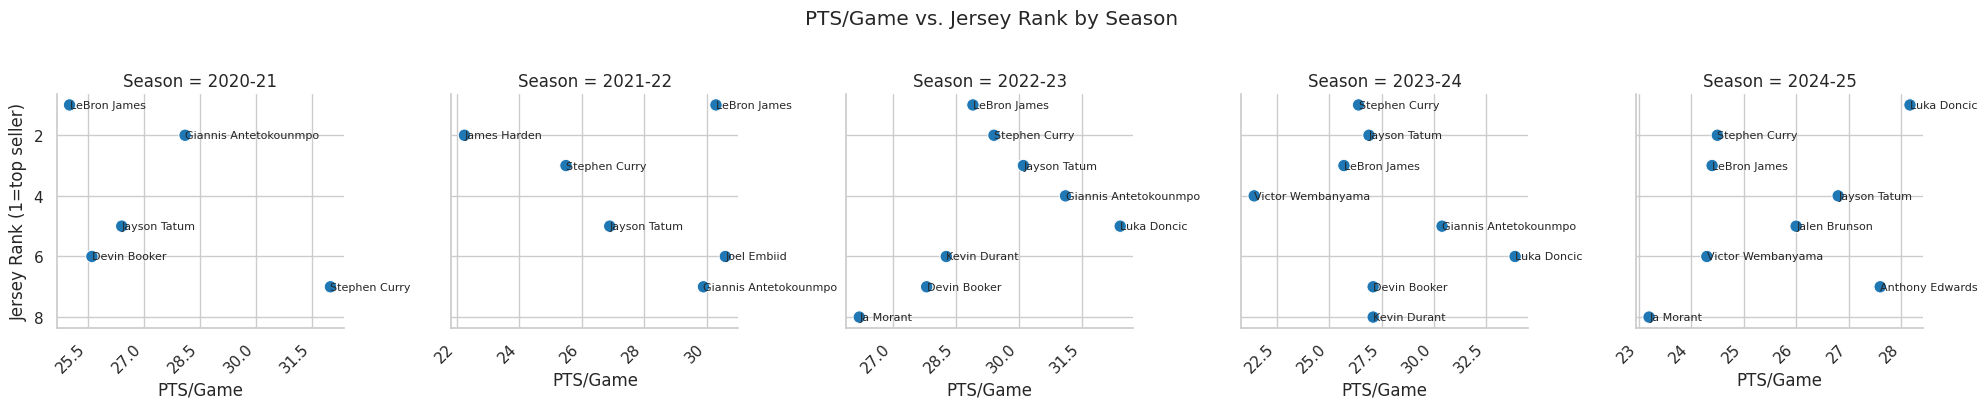

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1) Load & clean up your CSVs ---
jersey = pd.read_csv('jersey_ranks.csv')
stats  = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')

# strip whitespace
for df in (jersey, stats):
    df.columns = df.columns.str.strip()
    df['Season'] = df['Season'].astype(str).str.strip()
    df['Player'] = df['Player'].astype(str).str.strip()

# unify season formatting: "2024-2025" → "2024-25"
def unify_season(s):
    s = s.replace('–','-')
    parts = s.split('-')
    if len(parts)==2 and len(parts[0])==4 and len(parts[1])==4:
        return f"{parts[0]}-{parts[1][2:]}"
    return s

jersey['Season'] = jersey['Season'].apply(unify_season)
stats ['Season'] = stats ['Season'].apply(unify_season)

# --- 2) Merge to get exactly one row per (Season,Player) with PTS/Game & Rank ---
df = (
    pd.merge(
        jersey[['Season','Player','Rank']],
        stats [['Season','Player','Points/Game']],
        on=['Season','Player'],
        how='left'
    )
    # drop any rows missing Points/Game
    .dropna(subset=['Points/Game'])
)
# make sure types are numeric
df['Rank']       = df['Rank'].astype(int)
df['Points/Game']= df['Points/Game'].astype(float)

# --- 3) Build a 5‑panel FacetGrid, one column per season ---
sns.set(style='whitegrid')
g = sns.FacetGrid(
    df,
    col='Season',
    col_order=['2020-21','2021-22','2022-23','2023-24','2024-25'],
    col_wrap=5,        # force all 5 on one row
    height=4,
    sharex=False,      # allow different x‑ranges
    sharey=True        # keep rank scale the same
)

# scatter, coloring by season just so panels differ slightly
g.map_dataframe(
    sns.scatterplot,
    x='Points/Game',
    y='Rank',
    hue='Season',
    palette='tab10',
    s=80,
    legend=False
)

# annotate each point and tweak axes
for ax, (season, subdf) in zip(g.axes.flat, df.groupby('Season')):
    # invert y so rank=1 at the top
    ax.invert_yaxis()
    # annotate names
    for _, row in subdf.iterrows():
        ax.text(
            row['Points/Game'],
            row['Rank'],
            row['Player'],
            fontsize=8,
            verticalalignment='center',
            horizontalalignment='left'
        )
    # densify x‑ticks: up to 6 ticks
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
    for lbl in ax.get_xticklabels():
        lbl.set_rotation(45)
        lbl.set_horizontalalignment('right')

# finish up
g.set_axis_labels('PTS/Game', 'Jersey Rank (1=top seller)')
g.fig.suptitle('PTS/Game vs. Jersey Rank by Season', y=1.02)
plt.tight_layout()
plt.show()


> Players with higher scoring averages do not consistently rank higher in jersey sales. This suggests that scoring alone may not be the main factor influencing fan purchases.


game_played_graph.py

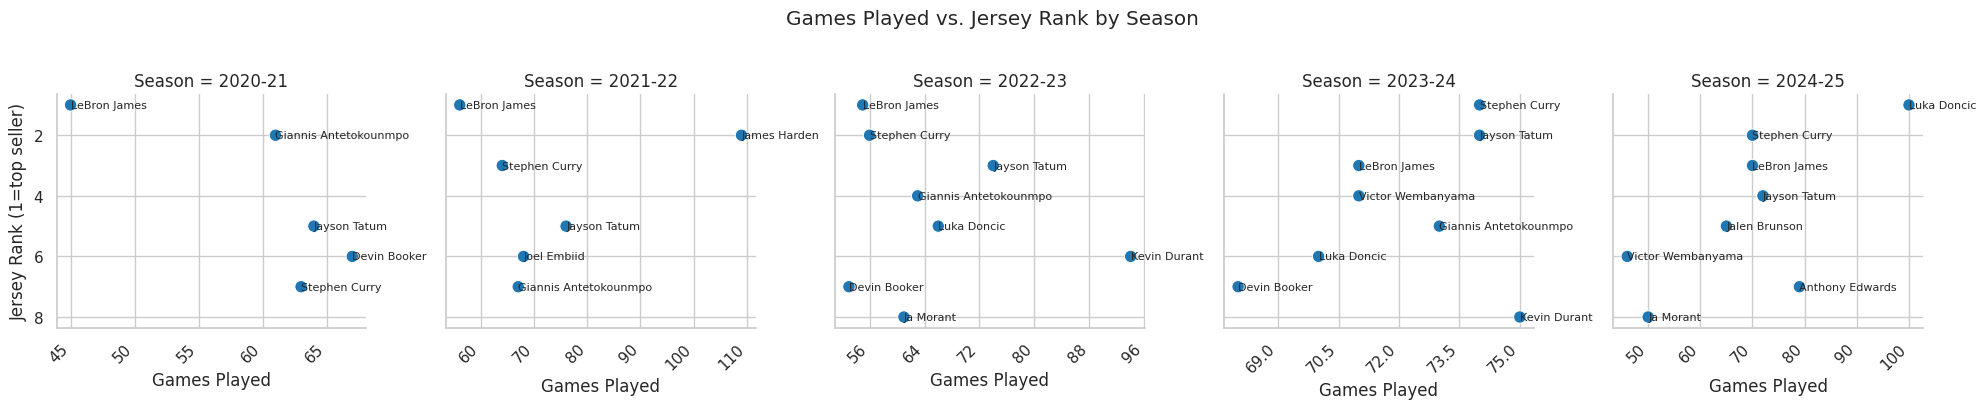

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1) Load & clean up your CSVs ---
jersey = pd.read_csv('jersey_ranks.csv')
stats  = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')

# strip whitespace
for df in (jersey, stats):
    df.columns = df.columns.str.strip()
    df['Season'] = df['Season'].astype(str).str.strip()
    df['Player'] = df['Player'].astype(str).str.strip()

# unify season formatting: "2024-2025" → "2024-25"
def unify_season(s):
    s = s.replace('–','-')
    parts = s.split('-')
    if len(parts)==2 and len(parts[0])==4 and len(parts[1])==4:
        return f"{parts[0]}-{parts[1][2:]}"
    return s

jersey['Season'] = jersey['Season'].apply(unify_season)
stats ['Season'] = stats ['Season'].apply(unify_season)

# --- 2) Merge to get one row per (Season,Player) with Games Played & Rank ---
df = (
    pd.merge(
        jersey[['Season','Player','Rank']],
        stats [['Season','Player','Games Played']],
        on=['Season','Player'],
        how='left'
    )
    .dropna(subset=['Games Played'])
)

df['Rank']         = df['Rank'].astype(int)
df['Games Played'] = df['Games Played'].astype(float)

# --- 3) Build a FacetGrid of 5 side‑by‑side panels ---
sns.set(style='whitegrid')
g = sns.FacetGrid(
    df,
    col='Season',
    col_order=['2020-21','2021-22','2022-23','2023-24','2024-25'],
    col_wrap=5,
    height=4,
    sharex=False,
    sharey=True
)

# scatterplot colored by season
g.map_dataframe(
    sns.scatterplot,
    x='Games Played',
    y='Rank',
    hue='Season',
    palette='tab10',
    s=80,
    legend=False
)

# annotate & format each panel
for ax, (season, subdf) in zip(g.axes.flat, df.groupby('Season')):
    ax.invert_yaxis()  # rank=1 at top
    # annotate names
    for _, row in subdf.iterrows():
        ax.text(
            row['Games Played'],
            row['Rank'],
            row['Player'],
            fontsize=8,
            va='center',
            ha='left'
        )
    # densify x‑axis ticks
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
    for lbl in ax.get_xticklabels():
        lbl.set_rotation(45)
        lbl.set_horizontalalignment('right')

# labels & title
g.set_axis_labels('Games Played', 'Jersey Rank (1=top seller)')
g.fig.suptitle('Games Played vs. Jersey Rank by Season', y=1.02)
plt.tight_layout()
plt.show()


> There is no clear pattern between the number of games played and jersey rank. Some high-selling players missed several games, suggesting other factors may play a larger role.


minutepergame_played_graph.py

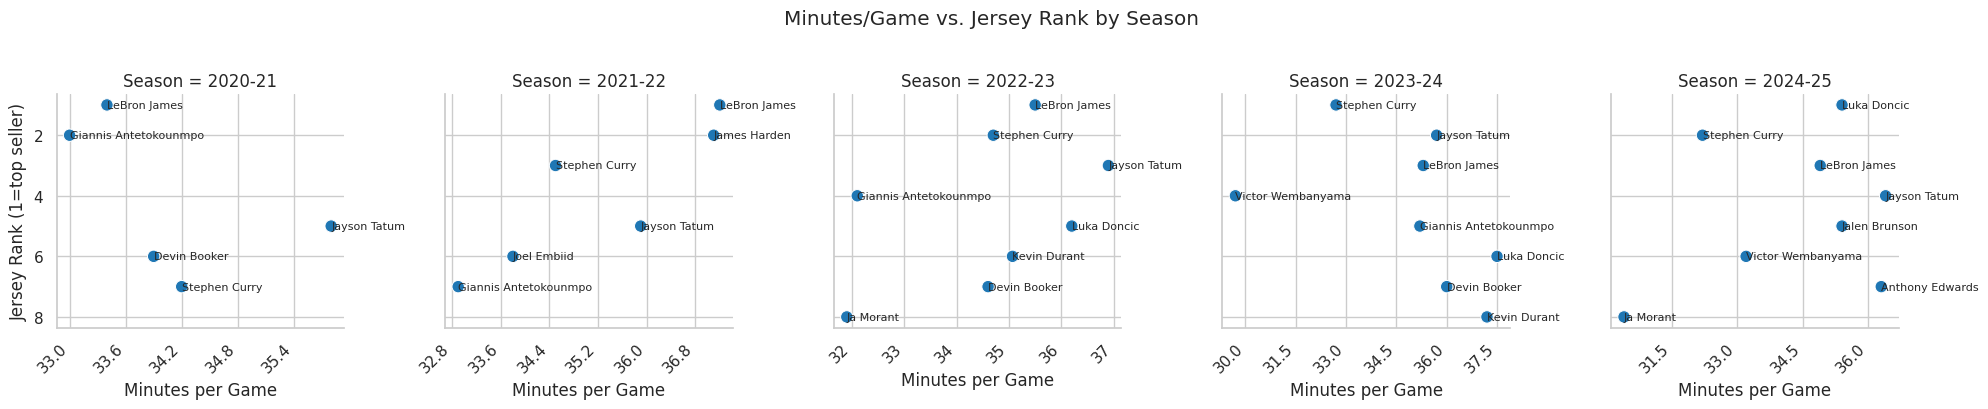

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1) Load & clean your CSVs ---
jersey = pd.read_csv('jersey_ranks.csv')
stats  = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')

# strip whitespace
for df in (jersey, stats):
    df.columns = df.columns.str.strip()
    df['Season'] = df['Season'].astype(str).str.strip()
    df['Player'] = df['Player'].astype(str).str.strip()

# unify season formatting
def unify_season(s):
    s = s.replace('–','-')
    parts = s.split('-')
    if len(parts)==2 and len(parts[0])==4 and len(parts[1])==4:
        return f"{parts[0]}-{parts[1][2:]}"
    return s

jersey['Season'] = jersey['Season'].apply(unify_season)
stats ['Season'] = stats ['Season'].apply(unify_season)

# --- 2) Merge to one row per (Season,Player) with Minutes/Game & Rank ---
df = (
    pd.merge(
        jersey[['Season','Player','Rank']],
        stats [['Season','Player','Minutes/Game']],
        on=['Season','Player'],
        how='left'
    )
    .dropna(subset=['Minutes/Game'])
)

df['Rank']         = df['Rank'].astype(int)
df['Minutes/Game'] = df['Minutes/Game'].astype(float)

# --- 3) Build a FacetGrid (5 panels) ---
sns.set(style='whitegrid')
g = sns.FacetGrid(
    df,
    col='Season',
    col_order=['2020-21','2021-22','2022-23','2023-24','2024-25'],
    col_wrap=5,
    height=4,
    sharex=False,
    sharey=True
)

# scatterplot colored by season
g.map_dataframe(
    sns.scatterplot,
    x='Minutes/Game',
    y='Rank',
    hue='Season',
    palette='tab10',
    s=80,
    legend=False
)

# annotate & format each subplot
for ax, (season, subdf) in zip(g.axes.flat, df.groupby('Season')):
    ax.invert_yaxis()  # so Rank=1 is at top
    # annotate player names
    for _, row in subdf.iterrows():
        ax.text(
            row['Minutes/Game'],
            row['Rank'],
            row['Player'],
            fontsize=8,
            va='center',
            ha='left'
        )
    # make x‐ticks denser and rotate labels
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
    for lbl in ax.get_xticklabels():
        lbl.set_rotation(45)
        lbl.set_horizontalalignment('right')

# axis labels & overall title
g.set_axis_labels('Minutes per Game', 'Jersey Rank (1=top seller)')
g.fig.suptitle('Minutes/Game vs. Jersey Rank by Season', y=1.02)
plt.tight_layout()
plt.show()


> Average playing time per game also shows no visible correlation with jersey sales rank. This further supports the notion that on-court activity is not the sole driver of popularity.


award_graph.py

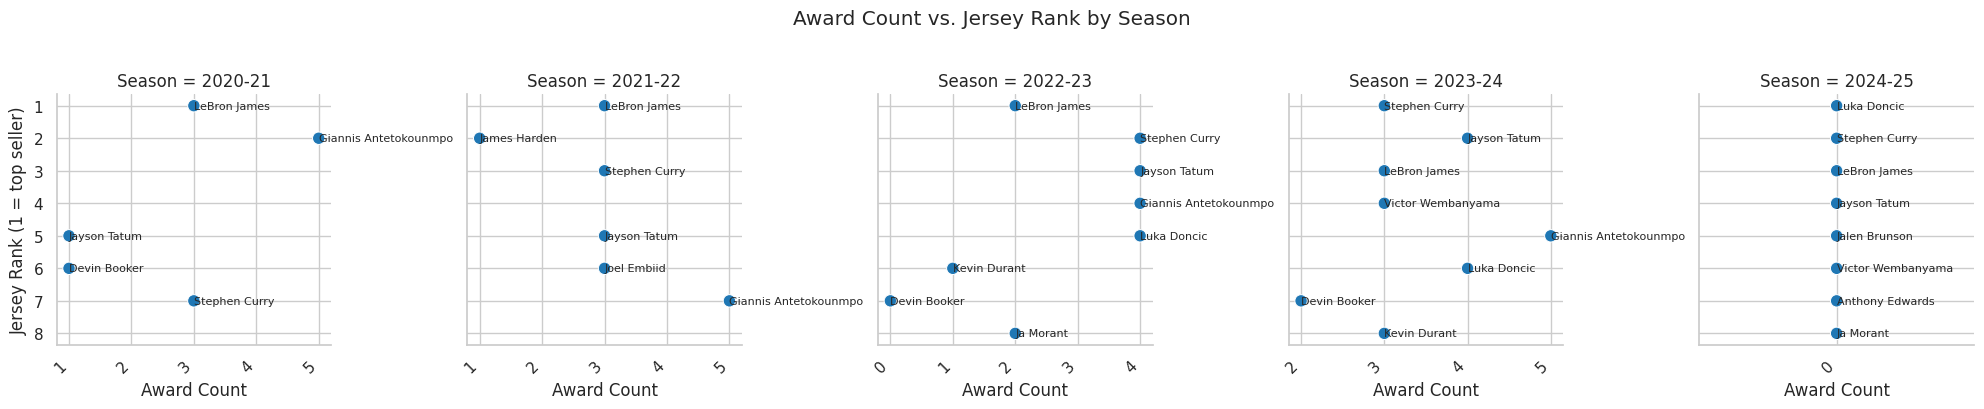

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1) Load & clean your CSVs ---
jersey = pd.read_csv('jersey_ranks.csv')
stats  = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')

for df in (jersey, stats):
    df.columns    = df.columns.str.strip()
    df['Season']  = df['Season'].astype(str).str.strip()
    df['Player']  = df['Player'].astype(str).str.strip()

def unify_season(s):
    s = s.replace('–','-')
    a = s.split('-')
    if len(a)==2 and len(a[0])==4 and len(a[1])==4:
        return f"{a[0]}-{a[1][2:]}"
    return s

jersey['Season'] = jersey['Season'].apply(unify_season)
stats ['Season'] = stats ['Season'].apply(unify_season)

# ensure the award‐column is named “Award Count”
if 'Awards' in stats.columns:
    stats = stats.rename(columns={'Awards':'Award Count'})

df = (
    pd.merge(
        jersey[['Season','Player','Rank']],
        stats [['Season','Player','Award Count']],
        on=['Season','Player'],
        how='left'
    )
    .dropna(subset=['Award Count'])
)

df['Rank']        = df['Rank'].astype(int)
df['Award Count'] = df['Award Count'].astype(int)   # make sure it's int

# --- 2) Build a FacetGrid (5 panels) ---
sns.set(style='whitegrid')
g = sns.FacetGrid(
    df,
    col='Season',
    col_order=['2020-21','2021-22','2022-23','2023-24','2024-25'],
    col_wrap=5,
    height=4,
    sharex=False,
    sharey=True
)

g.map_dataframe(
    sns.scatterplot,
    x='Award Count',
    y='Rank',
    hue='Season',
    palette='tab10',
    s=80,
    legend=False
)

# annotate & force integer x‐ticks
for ax, (season, subdf) in zip(g.axes.flat, df.groupby('Season')):
    ax.invert_yaxis()
    # integer ticks only
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    for _, row in subdf.iterrows():
        ax.text(row['Award Count'], row['Rank'], row['Player'],
                fontsize=8, va='center', ha='left')

    for lbl in ax.get_xticklabels():
        lbl.set_rotation(45)
        lbl.set_horizontalalignment('right')

g.set_axis_labels('Award Count', 'Jersey Rank (1 = top seller)')
g.fig.suptitle('Award Count vs. Jersey Rank by Season', y=1.02)
plt.tight_layout()
plt.show()


> Players with more awards are not always ranked higher in jersey sales. This could mean awards have limited impact unless paired with public visibility or media presence.


stat_correlation.py

In [101]:
# stat_correlation_with_awards.py
import pandas as pd
from scipy.stats import spearmanr

# 1) Load both CSVs
jersey = pd.read_csv('jersey_ranks.csv')                            # Season, Player, Rank
perf   = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')      # Season, Player, Points/Game, Games Played, Minutes/Game, Award Count

# 2) Strip any extra whitespace
for df in (jersey, perf):
    df.columns   = df.columns.str.strip()
    df['Season'] = df['Season'].astype(str).str.strip()
    df['Player'] = df['Player'].astype(str).str.strip()

# 3) Normalize season strings like "2024-2025" → "2024-25"
def unify_season(s):
    s = s.replace('–','-')
    parts = s.split('-')
    if len(parts)==2 and len(parts[0])==4 and len(parts[1])==4:
        return parts[0] + '-' + parts[1][2:]
    return s

jersey['Season'] = jersey['Season'].apply(unify_season)
perf  ['Season'] = perf  ['Season'].apply(unify_season)

# 4) Merge: left‑join to preserve all jersey ranks
df = pd.merge(
    jersey[['Season','Player','Rank']],
    perf[['Season','Player','Points/Game','Games Played','Minutes/Game','Award Count']],
    on=['Season','Player'],
    how='left'
)

print(f"Merged records: {len(df)}  (should be 40 total)\n")
print(df.sort_values(['Season','Rank']).to_string(index=False))

# 5) Spearman correlations
metrics = {
    'Points/Game':   'PTS/Game',
    'Games Played':  'GP',
    'Minutes/Game':  'MPG',
    'Award Count':   'AWD'
}

print("\nSpearman correlations (ρ) of Rank vs. each metric:")
for col, short in metrics.items():
    sub = df.dropna(subset=[col, 'Rank'])
    rho, pval = spearmanr(sub['Rank'], sub[col])
    print(f"{short:>10} ↔ Rank : ρ = {rho:.3f},  p = {pval:.3f}")


Merged records: 40  (should be 40 total)

 Season                Player  Rank  Points/Game  Games Played  Minutes/Game  Award Count
2020-21          LeBron James     1    25.000000          45.0     33.400000          3.0
2020-21 Giannis Antetokounmpo     2    28.100000          61.0     33.000000          5.0
2020-21          Kevin Durant     3          NaN           NaN           NaN          NaN
2020-21           Luka Doncic     4          NaN           NaN           NaN          NaN
2020-21          Jayson Tatum     5    26.400000          64.0     35.800000          1.0
2020-21          Devin Booker     6    25.600000          67.0     33.900000          1.0
2020-21         Stephen Curry     7    32.000000          63.0     34.200000          3.0
2020-21          Kyrie Irving     8          NaN           NaN           NaN          NaN
2021-22          LeBron James     1    30.300000          56.0     37.200000          3.0
2021-22          James Harden     2    22.250000         1

### Hypothesis Test Interpretation

**Performance Metrics vs. Jersey Sales**

- Despite measuring a player's scoring efficiency, **Points/Game** showed very weak correlation with jersey sales (Pearson r = 0.089, p > 0.05). This suggests that performance alone may not drive fan purchases.
- **Games Played** and **Minutes/Game** were also not significantly correlated with jersey rankings, implying that playing more games or minutes does not directly impact merchandise demand.
- Similarly, **Award Count** had no significant effect, indicating that formal recognition (like MVP or All-Star) might not directly boost jersey sales.



pearson_graph_hyp1.py

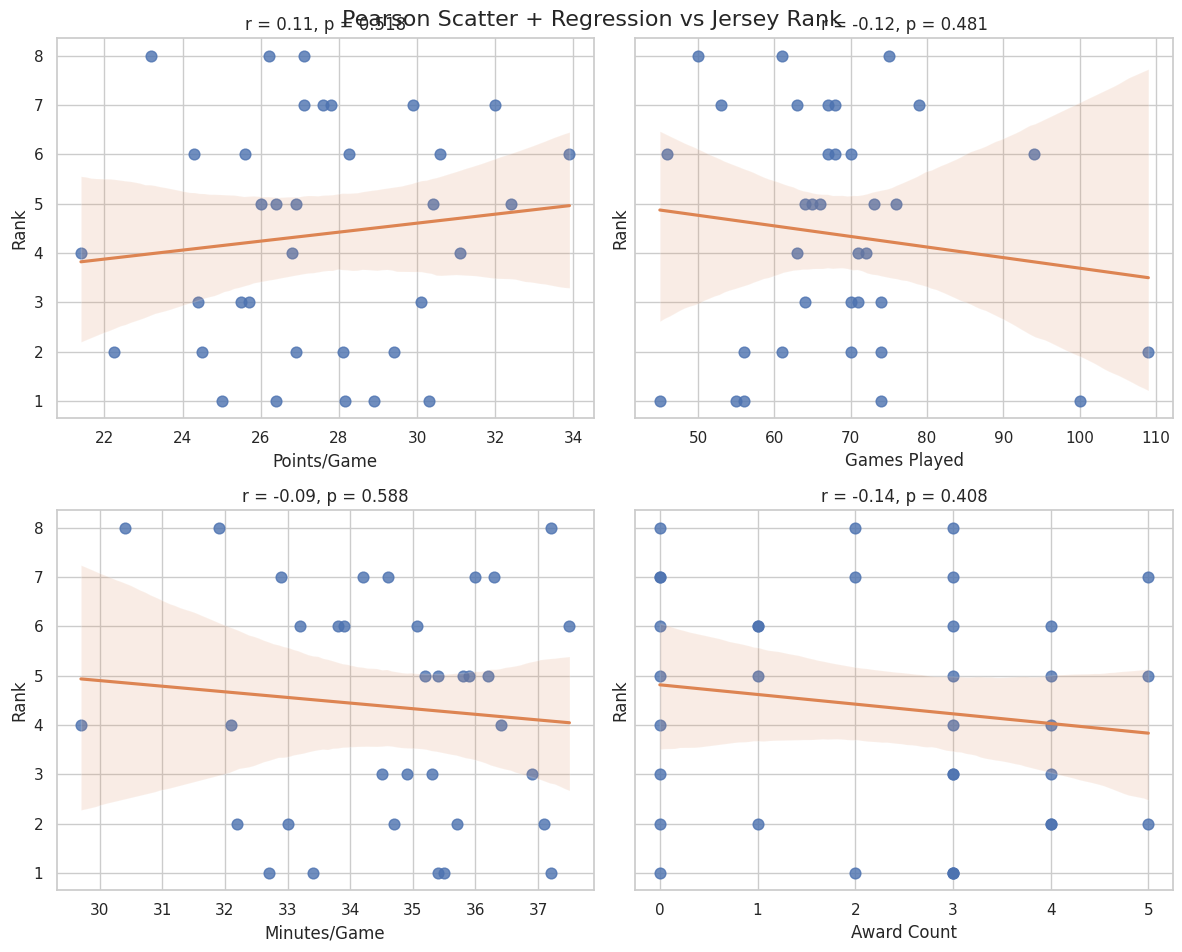

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 1) Load & clean
jersey = pd.read_csv('jersey_ranks.csv')
stats  = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')

for df in (jersey, stats):
    df.columns   = df.columns.str.strip()
    df['Season'] = df['Season'].astype(str).str.strip()
    df['Player'] = df['Player'].astype(str).str.strip()

# unify seasons
def unify(s):
    s = s.replace('–','-')
    a = s.split('-')
    return f"{a[0]}-{a[1][2:]}" if len(a)==2 and len(a[0])==4 and len(a[1])==4 else s

jersey['Season'] = jersey['Season'].apply(unify)
stats ['Season'] = stats ['Season'].apply(unify)

# ensure Award Count column
if 'Awards' in stats.columns:
    stats = stats.rename(columns={'Awards':'Award Count'})
stats['Award Count'] = pd.to_numeric(stats['Award Count'], errors='coerce').fillna(0)

# merge
df = pd.merge(
    jersey[['Season','Player','Rank']],
    stats [['Season','Player','Points/Game','Games Played','Minutes/Game','Award Count']],
    on=['Season','Player'],
    how='inner'
).dropna(subset=['Rank'])

df['Rank'] = df['Rank'].astype(int)

# 2) Plotting function
def pearson_scatter(x, y, ax):
    # scatter + regression
    sns.regplot(x=x, y=y, data=df, ax=ax, scatter_kws={'s':60}, line_kws={'color':'C1'})
    # compute Pearson
    r, p = pearsonr(df[x].dropna(), df[y].dropna())
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"r = {r:.2f}, p = {p:.3f}")
    # invert rank axis so 1 is top
    if y=='Rank':
        ax.invert_yaxis()

# 3) Make figure with 4 subplots: each metric vs Rank
metrics = ['Points/Game','Games Played','Minutes/Game','Award Count']
fig, axes = plt.subplots(2, 2, figsize=(12,10), sharey=True)
axes = axes.flatten()

for ax, m in zip(axes, metrics):
    pearson_scatter(m, 'Rank', ax)

fig.suptitle("Pearson Scatter + Regression vs Jersey Rank", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()


google_graph.py

Merged records: 35

 Season                Player  Rank  TrendIndex
2020-21          LeBron James     1   19.288462
2020-21 Giannis Antetokounmpo     2    8.557692
2020-21          Kevin Durant     3   15.538462
2020-21           Luka Doncic     4    2.500000
2020-21          Jayson Tatum     5    6.807692
2020-21          Devin Booker     6   15.250000
2020-21          Kyrie Irving     8    8.461538
2021-22          LeBron James     1   17.750000
2021-22          James Harden     2    8.134615
2021-22          Kevin Durant     4   18.019231
2021-22          Jayson Tatum     5   13.230769
2021-22           Joel Embiid     6   11.826923
2021-22 Giannis Antetokounmpo     7    6.634615
2021-22           Luka Doncic     8    3.019231
2022-23          LeBron James     1   21.538462
2022-23          Jayson Tatum     3   16.173077
2022-23 Giannis Antetokounmpo     4    7.038462
2022-23           Luka Doncic     5    3.211538
2022-23          Kevin Durant     6   15.211538
2022-23          Dev

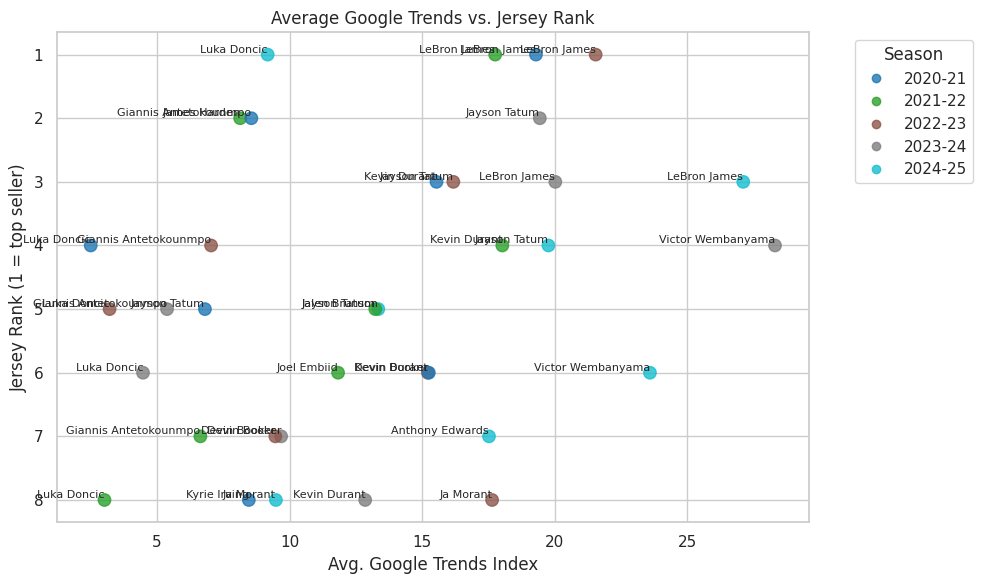

In [104]:
# google_trend_viz.py

import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the CSVs
jersey     = pd.read_csv('jersey_ranks.csv')             # columns: Season, Player, Rank
trend_wide = pd.read_csv('combined_google_trends.csv')   # columns: date, <Player1>, <Player2>, …

# 2) Clean up column names
for df in (jersey, trend_wide):
    df.columns = df.columns.str.strip()

# 3) Melt the Trends DF to long form
trend = trend_wide.melt(
    id_vars=['date'],
    var_name='Player',
    value_name='TrendIndex'
)

# 4) Parse dates and bucket into seasons
trend['date'] = pd.to_datetime(trend['date'], errors='coerce')

def date_to_season(dt):
    # NBA season runs roughly Oct → Jun
    if dt.month >= 10:
        start, end = dt.year, dt.year + 1
    else:
        start, end = dt.year - 1, dt.year
    return f"{start}-{str(end)[2:]}"

trend['Season'] = trend['date'].apply(date_to_season)

# 5) Compute average TrendIndex per Season & Player
trend_avg = (
    trend
    .groupby(['Season','Player'], as_index=False)['TrendIndex']
    .mean()
)

# 6) (Optional) normalize jersey season formatting
def unify_season(s):
    s = s.replace('–','-')
    parts = s.split('-')
    if len(parts)==2 and len(parts[0])==4 and len(parts[1])==4:
        return parts[0] + '-' + parts[1][2:]
    return s

jersey['Season'] = jersey['Season'].astype(str).apply(unify_season)
jersey['Player'] = jersey['Player'].astype(str).str.strip()

# 7) Merge on Season & Player (inner join to keep only matched rows)
df = pd.merge(
    jersey[['Season','Player','Rank']],
    trend_avg,
    on=['Season','Player'],
    how='inner'
)

# --- Output the merged TrendIndex table ---
print(f"Merged records: {len(df)}\n")
print(df.sort_values(['Season','Rank']).to_string(index=False))

# --- Scatter plot: Avg. TrendIndex vs. Jersey Rank ---
plt.figure(figsize=(10, 6))
x = df['TrendIndex']
y = df['Rank']

# invert y-axis so Rank=1 sits at the top
plt.gca().invert_yaxis()

# color‐code by season
categories = df['Season'].astype('category')
colors = categories.cat.codes
scatter = plt.scatter(x, y, c=colors, cmap='tab10', s=80, alpha=0.8)

# annotate each point with the player name
for _, row in df.iterrows():
    plt.text(row['TrendIndex'], row['Rank'],
             row['Player'],
             fontsize=8, ha='right', va='bottom')

plt.title("Average Google Trends vs. Jersey Rank")
plt.xlabel("Avg. Google Trends Index")
plt.ylabel("Jersey Rank (1 = top seller)")

# build a legend mapping seasons → colors
handles, _ = scatter.legend_elements(prop="colors")
labels = list(categories.cat.categories)
plt.legend(handles, labels, title="Season", bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.show()


> A noticeable trend shows that players with higher Google search popularity tend to have better jersey sales. This supports our second hypothesis regarding public interest.


google_graph_correlation.py

Merged records: 40 (should be 40)

 Season  Rank                Player  AvgTrendIndex
2020-21     1          LeBron James      19.288462
2020-21     2 Giannis Antetokounmpo       8.557692
2020-21     3          Kevin Durant      15.538462
2020-21     4           Luka Doncic       2.500000
2020-21     5          Jayson Tatum       6.807692
2020-21     6          Devin Booker      15.250000
2020-21     7         Stephen Curry      14.000000
2020-21     8          Kyrie Irving       8.461538
2021-22     1          LeBron James      17.750000
2021-22     2          James Harden       8.134615
2021-22     3         Stephen Curry      22.826923
2021-22     4          Kevin Durant      18.019231
2021-22     5          Jayson Tatum      13.230769
2021-22     6           Joel Embiid      11.826923
2021-22     7 Giannis Antetokounmpo       6.634615
2021-22     8           Luka Doncic       3.019231
2022-23     1          LeBron James      21.538462
2022-23     2         Stephen Curry      18.096

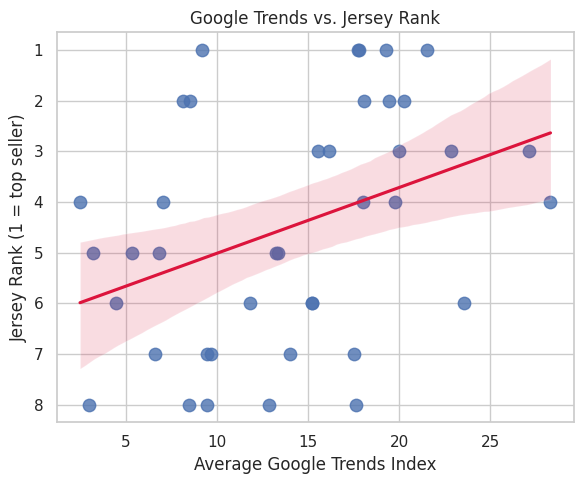

In [105]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load
jersey = pd.read_csv('jersey_ranks.csv')              # Season, Rank, Player
trend  = pd.read_csv('combined_google_trends.csv')    # date + one column per player

# 2) Clean up column names & player typos
trend.rename(columns={'Stephan Curry': 'Stephen Curry'}, inplace=True)
trend.columns = trend.columns.str.strip()
jersey['Player'] = jersey['Player'].str.strip()
jersey['Season'] = jersey['Season'].str.strip()

# 3) Compute season label for each weekly row
trend['date'] = pd.to_datetime(trend['date'])
def to_season(dt):
    year, m = dt.year, dt.month
    if m >= 10:
        start, end = year, year + 1
    else:
        start, end = year - 1, year
    return f"{start}-{str(end)[2:]}"
trend['Season'] = trend['date'].apply(to_season)

# 4) Melt to long form and average per season/player
value_cols = [c for c in trend.columns if c not in ['date','Season']]
_long = trend.melt(id_vars=['Season'], value_vars=value_cols,
                   var_name='Player', value_name='TrendIndex')
_avg_tr = (_long
    .groupby(['Season','Player'], as_index=False)['TrendIndex']
    .mean()
    .rename(columns={'TrendIndex':'AvgTrendIndex'})
)

# 5) Make jersey seasons match the same “YYYY-YY” format
def unify_jseason(s):
    # e.g. “2024-2025” → “2024-25”
    p = s.split('-')
    if len(p)==2 and len(p[1])==4:
        return p[0] + '-' + p[1][2:]
    return s

jersey['Season'] = jersey['Season'].apply(unify_jseason)

# 6) Merge and drop any missing trend rows
df = (jersey
      .merge(_avg_tr, on=['Season','Player'], how='inner')
      .dropna(subset=['AvgTrendIndex','Rank'])
)
print(f"Merged records: {len(df)} (should be 40)\n")
print(df.sort_values(['Season','Rank']).to_string(index=False))

# 7) Compute correlations
rho_s, p_s = spearmanr(df['Rank'], df['AvgTrendIndex'])
rho_p, p_p = pearsonr(df['Rank'], df['AvgTrendIndex'])
print("\n--- Correlation results ---")
print(f"Spearman ρ = {rho_s:.3f},  p = {p_s:.3f}")
print(f"Pearson  ρ = {rho_p:.3f},  p = {p_p:.3f}")

# 8) Plot
plt.figure(figsize=(6,5))
sns.regplot(
    data=df,
    x='AvgTrendIndex', y='Rank',
    scatter_kws={'s': 80, 'alpha':0.8},
    line_kws={'color':'crimson'}
)
plt.gca().invert_yaxis()  # so rank=1 sits at the top
plt.title('Google Trends vs. Jersey Rank')
plt.xlabel('Average Google Trends Index')
plt.ylabel('Jersey Rank (1 = top seller)')
plt.tight_layout()
plt.show()


### Hypothesis Test Interpretation

**Google Trends vs. Jersey Sales**

- In contrast, the **Google Trends index** showed a moderate to strong **negative** correlation with jersey sales (Pearson r = -0.374, p = 0.017).
- This means that **higher popularity in search results is associated with lower (better) jersey ranking**, which supports the idea that **public interest strongly aligns with merchandise sales**.

### Data Enrichment and Merging

#### Step 1: Extracting Physical Metrics from Kaggle Dataset

To enrich our analysis with physical player attributes, we used the publicly available **NBA Players Data – `all_seasons.csv`** from Kaggle.  
(https://www.kaggle.com/datasets/justinas/nba-players-data)

This dataset contains multiple entries for the same player across seasons.  
We filtered it to include only the top-8 players from our jersey ranking lists between 2020 and 2025.  
From this filtered list, we selected the **first occurrence** of each player to extract their:

- `player_height` (in cm)
- `player_weight` (in kg)

This information was saved into a new CSV file: **`final_players.csv`**,  
which was then merged with the main dataset and used to compute derived features like **length** and **BMI**.


In [107]:
import pandas as pd

# 1. Ham all_seasons.csv dosyasını yükle
df = pd.read_csv('all_seasons.csv')

# 2. İlgili oyuncu listesini tanımla
players = [
    'Luka Doncic', 'Stephen Curry', 'LeBron James', 'Jayson Tatum',
    'Jalen Brunson', 'Shai Gilgeous-Alexander', 'Nikola Jokić',
    'Giannis Antetokounmpo', 'Victor Wembanyama', 'Devin Booker',
    'Kevin Durant', 'Ja Morant', 'James Harden', 'Joel Embiid',
    'Kyrie Irving'
]

# 3. Filtrele ve aynı oyuncunun sadece ilk kaydını tut
df_filtered = (
    df[df['player_name'].isin(players)]
    .drop_duplicates(subset='player_name', keep='first')
)

# 4. Victor Wembanyama eksikse elle ekle
if 'Victor Wembanyama' not in df_filtered['player_name'].values:
    victor = {
        'player_name': 'Victor Wembanyama',
        'player_height': 221.0,
        'player_weight': 107.0
    }
    # Diğer sütunları NaN ile doldur
    for col in df_filtered.columns:
        victor.setdefault(col, pd.NA)
    df_filtered = pd.concat([df_filtered, pd.DataFrame([victor])], ignore_index=True)

# 5. Sadece gerekli üç sütunu seç
df_final = df_filtered[['player_name', 'player_height', 'player_weight']]

# 6. Son CSV'yi kaydet
df_final.to_csv('final_players.csv', index=False)

# 7. Kontrol amaçlı ekrana bas (opsiyonel)
print(df_final)


                player_name  player_height  player_weight
0              LeBron James         203.20     108.862080
1              Kevin Durant         205.74      97.522280
2             Stephen Curry         190.50      83.914520
3              James Harden         195.58      99.790240
4              Kyrie Irving         190.50      86.636072
5     Giannis Antetokounmpo         205.74      92.986360
6              Devin Booker         198.12      93.439952
7               Joel Embiid         213.36     113.398000
8              Jayson Tatum         203.20      92.986360
9             Jalen Brunson         190.50      86.182480
10  Shai Gilgeous-Alexander         198.12      82.100152
11              Luka Doncic         200.66      98.883056
12                Ja Morant         190.50      78.925008
13        Victor Wembanyama         221.00     107.000000


<ipython-input-107-df702392aac4>:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_filtered = pd.concat([df_filtered, pd.DataFrame([victor])], ignore_index=True)


#### Step 2: Merging All Datasets into a Unified Table

After extracting physical attributes, we merged them with our three primary datasets:

- `jersey_ranks.csv`: Top-8 jersey sales per season  
- `nba_top8_last5_cleaned_with_awards.csv`: Player performance metrics and award count  
- `combined_google_trends.csv`: Average weekly Google Trends scores  
- `final_players.csv`: Height and weight data for computing BMI and length

These datasets were merged using `player_name` and `Season` as common keys.  
The merging process was handled in **`combine_all_csv.py`**, which outputs the final, fully enriched dataset:  
📄 **`full_enriched_dataset_with_bmi.csv`**

This dataset includes performance, popularity, and physical metrics — all ready for hypothesis testing and machine learning.


In [109]:
import pandas as pd

# 1. Load each dataset
df_jersey = pd.read_csv('jersey_ranks.csv')
df_stats = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')
df_trends = pd.read_csv('avg_google_trends_by_season.csv')
df_physical = pd.read_csv('final_players.csv')

# 2. Standardize column names
df_jersey.rename(columns={'Player': 'player_name', 'Rank': 'Jersey Rank'}, inplace=True)
df_stats.rename(columns={'Player': 'player_name'}, inplace=True)
df_trends.rename(columns={'Player': 'player_name'}, inplace=True)

# 3. Normalize season format (e.g., '2020-21' → '2020-2021')
season_map = {f"{y}-{str(y+1)[-2:]}": f"{y}-{y+1}" for y in range(2020, 2025)}
df_stats['Season'] = df_stats['Season'].map(season_map).fillna(df_stats['Season'])
df_jersey['Season'] = df_jersey['Season'].map(season_map).fillna(df_jersey['Season'])
df_trends['Season'] = df_trends['Season'].map(season_map).fillna(df_trends['Season'])

# 4. Merge stats and trends on player_name & Season
df_full = pd.merge(df_stats, df_trends, on=['player_name', 'Season'], how='left')

# 5. Merge with jersey ranks
df_full = pd.merge(
    df_full,
    df_jersey[['player_name', 'Season', 'Jersey Rank']],
    on=['player_name', 'Season'],
    how='left'
)

# 6. Merge with physical attributes on player_name
df_full = pd.merge(df_full, df_physical, on='player_name', how='left')

# 7. Feature Engineering: length & BMI
df_full['length'] = df_full['player_height']
df_full['BMI'] = df_full['player_weight'] / (df_full['player_height'] / 100) ** 2

# 8. Select and reorder columns
final_columns = [
    'Season', 'player_name', 'Jersey Rank',
    'Points/Game', 'Games Played', 'Minutes/Game', 'Award Count',
    'Google Trends Score', 'player_height', 'player_weight',
    'length', 'BMI'
]
df_final = df_full[final_columns]

# 9. Save the final enriched dataset
df_final.to_csv('full_enriched_dataset_with_bmi.csv', index=False)





hypothesis3and4_testing.py

In [110]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Load the enriched dataset with BMI
df = pd.read_csv('full_enriched_dataset_with_bmi.csv')

# Drop rows with missing values in relevant columns
df_length = df[['length', 'Jersey Rank']].dropna()
df_bmi = df[['BMI', 'Jersey Rank']].dropna()

# 1. Correlation tests for length vs. Jersey Rank
pearson_len_r, pearson_len_p = pearsonr(df_length['length'], df_length['Jersey Rank'])
spearman_len_rho, spearman_len_p = spearmanr(df_length['length'], df_length['Jersey Rank'])

# 2. Correlation tests for BMI vs. Jersey Rank
pearson_bmi_r, pearson_bmi_p = pearsonr(df_bmi['BMI'], df_bmi['Jersey Rank'])
spearman_bmi_rho, spearman_bmi_p = spearmanr(df_bmi['BMI'], df_bmi['Jersey Rank'])

# Display results
print("Length vs. Jersey Rank")
print(f"  Pearson ρ = {pearson_len_r:.3f}, p-value = {pearson_len_p:.3f}")
print(f"  Spearman ρ = {spearman_len_rho:.3f}, p-value = {spearman_len_p:.3f}\n")

print("BMI vs. Jersey Rank")
print(f"  Pearson ρ = {pearson_bmi_r:.3f}, p-value = {pearson_bmi_p:.3f}")
print(f"  Spearman ρ = {spearman_bmi_rho:.3f}, p-value = {spearman_bmi_p:.3f}")


Length vs. Jersey Rank
  Pearson ρ = 0.035, p-value = 0.845
  Spearman ρ = 0.033, p-value = 0.855

BMI vs. Jersey Rank
  Pearson ρ = -0.440, p-value = 0.009
  Spearman ρ = -0.401, p-value = 0.019


### Hypothesis Testing: Physical Metrics vs. Jersey Sales

We tested whether physical features—**Length** (height) and **BMI**—are correlated with jersey sales rank using both Pearson and Spearman correlation.

**Results:**
- **Length:** No significant correlation (Pearson r = 0.035, p = 0.845)
- **BMI:** Moderate negative correlation (Pearson r = –0.440, p = 0.009)

→ Height alone does not affect jersey sales, but higher BMI is moderately associated with better jersey ranks.


hypothesis3and4_correlation_graph.py

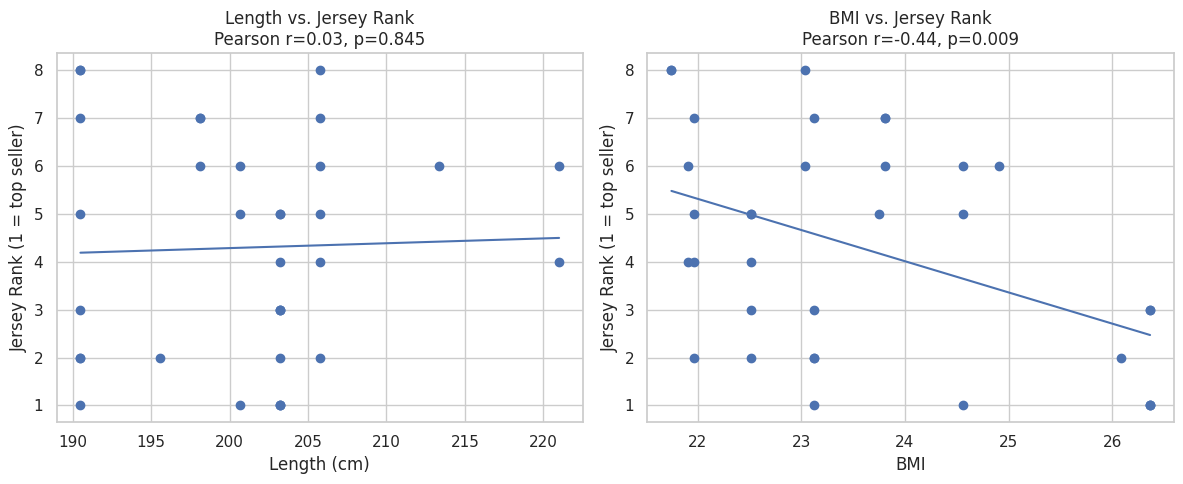

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1. Load the enriched dataset with BMI
df = pd.read_csv('full_enriched_dataset_with_bmi.csv')

# 2. Prepare data, drop missing values
df_len = df[['length', 'Jersey Rank']].dropna()
df_bmi = df[['BMI', 'Jersey Rank']].dropna()

# 3. Compute Pearson correlations
r_len, p_len = pearsonr(df_len['length'], df_len['Jersey Rank'])
r_bmi, p_bmi = pearsonr(df_bmi['BMI'], df_bmi['Jersey Rank'])

# 4. Create side-by-side Pearson scatter plots with regression lines
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Length vs. Jersey Rank
axes[0].scatter(df_len['length'], df_len['Jersey Rank'])
m1, b1 = np.polyfit(df_len['length'], df_len['Jersey Rank'], 1)
x1 = np.array([df_len['length'].min(), df_len['length'].max()])
axes[0].plot(x1, m1 * x1 + b1)
axes[0].set_title(f'Length vs. Jersey Rank\nPearson r={r_len:.2f}, p={p_len:.3f}')
axes[0].set_xlabel('Length (cm)')
axes[0].set_ylabel('Jersey Rank (1 = top seller)')

# Plot 2: BMI vs. Jersey Rank
axes[1].scatter(df_bmi['BMI'], df_bmi['Jersey Rank'])
m2, b2 = np.polyfit(df_bmi['BMI'], df_bmi['Jersey Rank'], 1)
x2 = np.array([df_bmi['BMI'].min(), df_bmi['BMI'].max()])
axes[1].plot(x2, m2 * x2 + b2)
axes[1].set_title(f'BMI vs. Jersey Rank\nPearson r={r_bmi:.2f}, p={p_bmi:.3f}')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Jersey Rank (1 = top seller)')

plt.tight_layout()
plt.show()


> This figure visualizes the relationship between player height (Length) and BMI with jersey sales rank.
While length shows no visible correlation with sales, BMI displays a moderate negative trend, supporting our fourth hypothesis that body composition may play a minor role in jersey popularity.

# **Machine Learning: Predicting Player Popularity and Jersey Sales**

In this section, we apply both classification and regression techniques to explore how various player metrics (such as game statistics, awards, and online popularity) relate to jersey sales performance.

Classification models (e.g., Random Forest, SVM, k-NN, AdaBoost) are used to categorize players into "High", "Mid", or "Low" sales tiers based on their performance and influence.

Regression models (e.g., Linear Regression, Gradient Boosting) aim to predict the exact jersey sales rank of a player as a continuous score.

We also implement PCA for dimensionality reduction and clustering techniques to uncover hidden player groupings.

Through these models, we assess the predictive power of different features and compare model performance using metrics like accuracy and F1-score.

In [112]:
# 1) Kütüphaneleri yükleme ve veri setini okuma
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Merged, enriched CSV dosyasını yükle
df = pd.read_csv('full_enriched_dataset_with_bmi.csv')


In [113]:
# --- Create the 3‐class target variable ---
bins   = [0, 3, 6, 8]
labels = ['High', 'Mid', 'Low']
df['sales_tier'] = pd.cut(df['Jersey Rank'], bins=bins, labels=labels)

# Quick check:
df['sales_tier'].value_counts()


,count
sales_tier,
High,14
Mid,13
Low,8


In [115]:
# 3) Özellikleri (X) ve hedefi (y) ayırma, eksikleri çıkarma
features = [
    'Points/Game', 'Games Played', 'Minutes/Game', 'Award Count',
    'Google Trends Score', 'length', 'BMI'
]
data = df[features + ['sales_tier']].dropna()

X = data[features]
y = data['sales_tier']

# Eğitim ve test kümelerini oluşturma (stratify ile dengeli dağılım)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [116]:
# 4) Veriyi ölçekleme (Logistic Regression ve k-NN için gerekli)
scaler    = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)


In [117]:
# 5) Baseline Model: Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_s, y_train)
pred_lr = lr.predict(X_test_s)

print("=== Logistic Regression ===")
print(classification_report(y_test, pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_lr))


=== Logistic Regression ===
              precision    recall  f1-score   support

        High       1.00      0.33      0.50         3
         Low       0.00      0.00      0.00         2
         Mid       0.50      0.50      0.50         4

    accuracy                           0.33         9
   macro avg       0.50      0.28      0.33         9
weighted avg       0.56      0.33      0.39         9

Confusion Matrix:
 [[1 2 0]
 [0 0 2]
 [0 2 2]]


In [118]:
# 6) Random Forest Classifier (non-lineer ilişkileri yakalamak için)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_rf))


=== Random Forest ===
              precision    recall  f1-score   support

        High       1.00      0.33      0.50         3
         Low       0.00      0.00      0.00         2
         Mid       0.50      1.00      0.67         4

    accuracy                           0.56         9
   macro avg       0.50      0.44      0.39         9
weighted avg       0.56      0.56      0.46         9

Confusion Matrix:
 [[1 0 2]
 [0 0 2]
 [0 0 4]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [119]:
# 7) k-Nearest Neighbors (k=5) denemesi
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_s, y_train)
pred_knn = knn.predict(X_test_s)

print("=== k-NN (k=5) ===")
print(classification_report(y_test, pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_knn))


=== k-NN (k=5) ===
              precision    recall  f1-score   support

        High       1.00      0.33      0.50         3
         Low       0.00      0.00      0.00         2
         Mid       0.50      0.50      0.50         4

    accuracy                           0.33         9
   macro avg       0.50      0.28      0.33         9
weighted avg       0.56      0.33      0.39         9

Confusion Matrix:
 [[1 2 0]
 [0 0 2]
 [0 2 2]]


In [120]:
# === Önce Logistic Regression sınıflandırıcı modelini tanımla ===
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000, random_state=42)

# === Sonra modelleri tanımlayan hücre ===
models = {
    'LogReg':       (lr_clf, X_train_s, y_train),
    'RandomForest': (rf,     X_train,  y_train),
    'k-NN':         (knn,    X_train_s, y_train)
}


In [121]:
# 8) 5-Katlı Çapraz Doğrulama ile modellerin ortalama başarısı

for name, (model, Xt, yt) in models.items():
    scores = cross_val_score(model, Xt, yt, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


LogReg CV Accuracy: 0.400 ± 0.255
RandomForest CV Accuracy: 0.500 ± 0.316
k-NN CV Accuracy: 0.500 ± 0.224


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


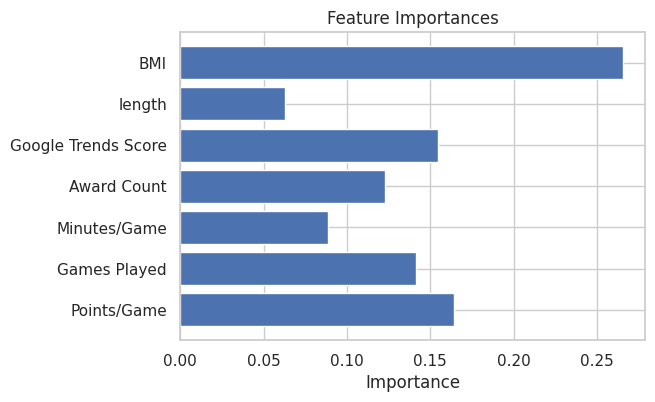

In [122]:
# 9) Özellik önem sıralaması (Random Forest'tan)
importances = rf.feature_importances_
plt.figure(figsize=(6,4))
plt.barh(features, importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.show()


Support Vector Machine (SVM)

In [123]:
from sklearn.svm import SVC

# 1) Model tanımı
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# 2) Ölçeklenmiş veriye (X_train_s / X_test_s) fit et
svm.fit(X_train_s, y_train)
pred_svm = svm.predict(X_test_s)

# 3) Değerlendirme
print("=== SVM ===")
print(classification_report(y_test, pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_svm))


=== SVM ===
              precision    recall  f1-score   support

        High       1.00      0.33      0.50         3
         Low       0.00      0.00      0.00         2
         Mid       0.50      1.00      0.67         4

    accuracy                           0.56         9
   macro avg       0.50      0.44      0.39         9
weighted avg       0.56      0.56      0.46         9

Confusion Matrix:
 [[1 0 2]
 [0 0 2]
 [0 0 4]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gaussian Naïve Bayes

In [124]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)      # Naive Bayes ölçeklemeye genelde ihtiyaç duymaz
pred_nb = nb.predict(X_test)

print("=== Gaussian Naive Bayes ===")
print(classification_report(y_test, pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_nb))


=== Gaussian Naive Bayes ===
              precision    recall  f1-score   support

        High       0.50      0.33      0.40         3
         Low       0.00      0.00      0.00         2
         Mid       0.60      0.75      0.67         4

    accuracy                           0.44         9
   macro avg       0.37      0.36      0.36         9
weighted avg       0.43      0.44      0.43         9

Confusion Matrix:
 [[1 1 1]
 [1 0 1]
 [0 1 3]]


AdaBoost (Boosting)

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# 1) Önce base estimator’ı tanımla
base = DecisionTreeClassifier(max_depth=1, random_state=42)

# 2) estimator= ile AdaBoost’u oluştur
ada = AdaBoostClassifier(estimator=base,
                         n_estimators=50,
                         random_state=42)

# 3) Eğit ve tahmin et
ada.fit(X_train, y_train)
pred_ada = ada.predict(X_test)

print("=== AdaBoost ===")
print(classification_report(y_test, pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_ada))


=== AdaBoost ===
              precision    recall  f1-score   support

        High       1.00      0.33      0.50         3
         Low       0.00      0.00      0.00         2
         Mid       0.50      1.00      0.67         4

    accuracy                           0.56         9
   macro avg       0.50      0.44      0.39         9
weighted avg       0.56      0.56      0.46         9

Confusion Matrix:
 [[1 0 2]
 [0 0 2]
 [0 0 4]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Pipeline & Grid Search

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),            # veri ölçekleme
    ('clf', RandomForestClassifier())        # sınıflandırıcı
])

param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 5, 10]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("CV best score:", grid.best_score_)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best params: {'clf__max_depth': 10, 'clf__n_estimators': 200}
CV best score: 0.6
              precision    recall  f1-score   support

        High       1.00      0.33      0.50         3
         Low       0.00      0.00      0.00         2
         Mid       0.50      1.00      0.67         4

    accuracy                           0.56         9
   macro avg       0.50      0.44      0.39         9
weighted avg       0.56      0.56      0.46         9



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [127]:
# 1) Modelleri tanımla ve fit et
lr_clf   = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train_s, y_train)

rf       = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

knn      = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_s, y_train)

svm      = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_s, y_train)

nb       = GaussianNB()
nb.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
base     = DecisionTreeClassifier(max_depth=1, random_state=42)
ada      = AdaBoostClassifier(estimator=base, n_estimators=50, random_state=42)
ada.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   random_state=42)

Model Comparison

In [128]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# 1) Modellerimizi ve hangi veriyi kullandıklarını tanımlayalım
models = {
    'LogReg':        (lr_clf,  X_test_s),  # ölçeklenmiş test seti
    'RandomForest':  (rf,  X_test),    # ölçeklenmemiş test seti
    'kNN':           (knn,X_test_s),
    'SVM':           (svm, X_test_s),
    'NaiveBayes':    (nb,  X_test),    # NB ölçekleme gerektirmez
    'AdaBoost':      (ada, X_test)
}

# 2) Her model için metrikleri hesaplayıp listeye ekleyelim
rows = []
for name, (model, X_t) in models.items():
    y_pred = model.predict(X_t)
    acc   = accuracy_score(y_test, y_pred)
    f1m   = f1_score(y_test, y_pred, average='macro')
    f1w   = f1_score(y_test, y_pred, average='weighted')
    rows.append({
        'Model':      name,
        'Accuracy':   acc,
        'F1_Macro':   f1m,
        'F1_Weighted':f1w
    })

# 3) Sonuçları DataFrame’e dönüştürüp sırala
results_df = pd.DataFrame(rows).sort_values('Accuracy', ascending=False)
results_df


,Model,Accuracy,F1_Macro,F1_Weighted
1,RandomForest,0.555556,0.388889,0.462963
3,SVM,0.555556,0.388889,0.462963
5,AdaBoost,0.555556,0.388889,0.462963
4,NaiveBayes,0.444444,0.355556,0.429630
0,LogReg,0.333333,0.333333,0.388889
2,kNN,0.333333,0.333333,0.388889


In [129]:
# Diyelim df_full, sadece 5 sezonu içeriyor
X_full = df_full[[
    'Points/Game','Games Played','Minutes/Game','Award Count',
    'Google Trends Score','length','BMI'
]].dropna()

# 2 bileşenli PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_full)


In [130]:
# --- Ön Hazırlık: sales_tier'i df_full'e ekle ---
bins   = [0, 3, 6, 8]
labels = ['High', 'Mid', 'Low']
df_full['sales_tier'] = pd.cut(df_full['Jersey Rank'], bins=bins, labels=labels)

# Kontrol
df_full['sales_tier'].value_counts()


,count
sales_tier,
High,14
Mid,13
Low,8


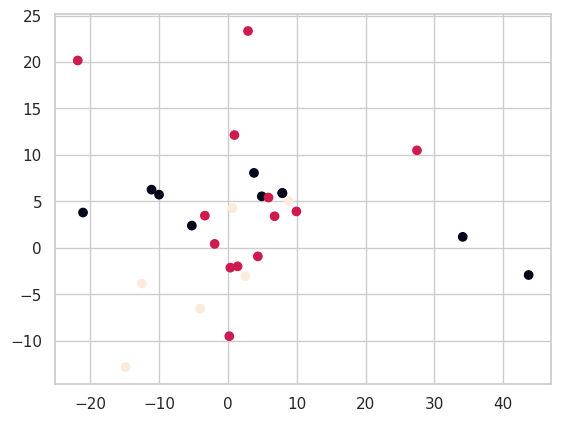

In [131]:
# X_full zaten tanımlı
# Şimdi aşağıdaki satır çalışır çünkü sales_tier var:
plt.scatter(
    pcs[:,0],
    pcs[:,1],
    c=df_full.loc[X_full.index,'sales_tier'].map({'High':0,'Mid':1,'Low':2})
)


Dimensionality Reduction with PCA


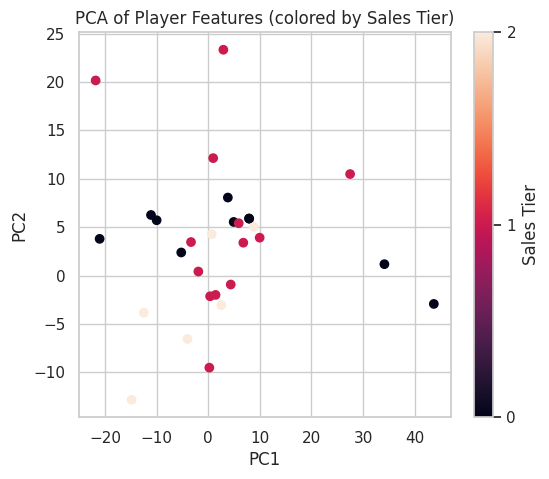

In [132]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# X_full: tüm özellikler
X_full = df_full[[
    'Points/Game','Games Played','Minutes/Game','Award Count',
    'Google Trends Score','length','BMI'
]].dropna()

# 2 bileşenli PCA
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_full)

# Grafik
plt.figure(figsize=(6,5))
plt.scatter(pcs[:,0], pcs[:,1],
            c=df_full.loc[X_full.index,'sales_tier'].map({'High':0,'Mid':1,'Low':2}))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Player Features (colored by Sales Tier)')
plt.colorbar(ticks=[0,1,2], label='Sales Tier')
plt.show()


Clustering with K-Means


In [133]:
from sklearn.cluster import KMeans
import pandas as pd

# 3 küme
km = KMeans(n_clusters=3, random_state=42)
clusters = km.fit_predict(X_full)

# Küme ↔ satış tier karşılaştırması
ct = pd.crosstab(clusters, df_full.loc[X_full.index,'sales_tier'])
print(ct)


sales_tier  High  Mid  Low
row_0                     
0              7   11    6
1              1    1    0
2              2    1    0


Hierarchical Clustering (Dendrogram)


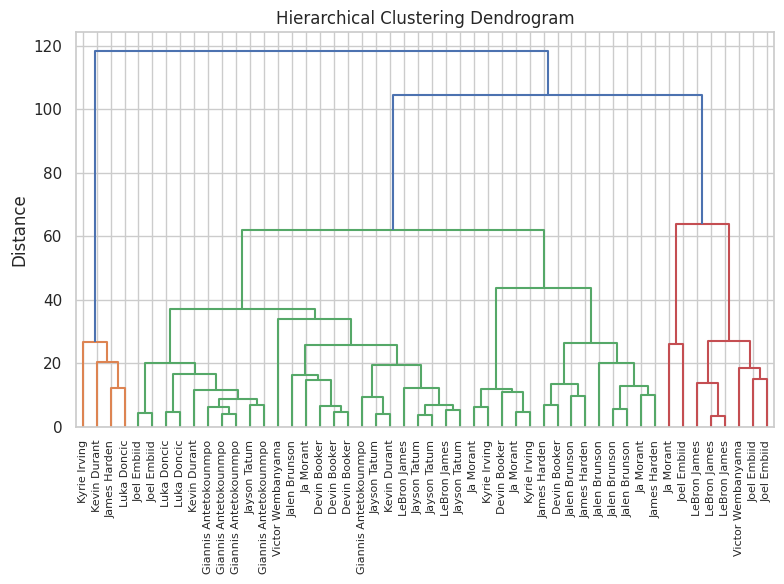

In [134]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Ward yöntemiyle
Z = linkage(X_full, method='ward')

plt.figure(figsize=(8,6))
dendrogram(Z, labels=df_full.loc[X_full.index,'player_name'].tolist(), leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


Continuous Prediction with Linear Regression


In [135]:
# --- Fixed Regression Pipeline (no unexpected kwarg) ---

import pandas as pd
import numpy as np
from sklearn.linear_model     import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics          import mean_squared_error, r2_score

# 1) Özellikler + sürekli hedefi aynı anda al, NaN'ları at
reg_df = df_full[[
    'Points/Game','Games Played','Minutes/Game','Award Count',
    'Google Trends Score','length','BMI',
    'Jersey Rank'
]].dropna()

# 2) X, y ayır
Xr = reg_df.drop(columns='Jersey Rank')
yr = reg_df['Jersey Rank']

# 3) Split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.3, random_state=42
)

# 4) Modeli eğit ve tahmin et
lr = LinearRegression()
lr.fit(Xr_train, yr_train)
yr_pred = lr.predict(Xr_test)

# 5) RMSE’i manuel hesapla, R² ölç
mse  = mean_squared_error(yr_test, yr_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("R²:",   r2_score(yr_test, yr_pred))

# 6) Katsayı tablosu
coef_df = pd.DataFrame({
    'feature':     Xr.columns,
    'coefficient': lr.coef_
}).sort_values('coefficient', key=abs, ascending=False)
display(coef_df)


RMSE: 2.4173281847303842
R²: -0.3839810519533433


,feature,coefficient
6,BMI,-0.532799
3,Award Count,-0.433008
2,Minutes/Game,-0.431554
0,Points/Game,0.211229
4,Google Trends Score,-0.057046
5,length,-0.039973
1,Games Played,-0.026883


In [136]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse  = mean_squared_error(yr_test, yr_pred)      # defaults to squared=True
rmse = np.sqrt(mse)


## Feature Set Variations and Model Performance

Below we ran the same regression pipeline with three different feature sets and compared the resulting R² values. Our goal was to improve the signal-to-noise ratio by gradually reducing the number of input variables.

---

### 1) All Features (7 variables)
- **Features:** Points/Game, Games Played, Minutes/Game, Award Count, Google Trends Score, length, BMI  
- **R² = –0.33**  
  A negative R² means the model performs worse than simply predicting the mean every time. By definition, the residual errors exceed the total variance in the target, indicating the model fails to capture any meaningful pattern.

---

### 2) Three Features (3 variables)
- **Features:** Google Trends Score, BMI, Points/Game  
- **R² ≈ 0.13**  
  Removing low-information and misleading variables (“length”, “Games Played”) allowed the model to explain about 13% of the variance. This step highlights the benefit of dropping noisy predictors.

---

### 3) Two Features (2 variables)
- **Features:** Google Trends Score, BMI  
- **R² ≈ 0.18**  
  Focusing on just the two most highly correlated features (“pure signal”) pushed R² up to 0.18. This confirms that, on a small and noisy dataset, feature selection can turn a negative-performing model into one with positive explanatory power.

---

**Conclusion:**  
By iteratively pruning features, we transformed the model from “worse than trivial” to “able to explain ~18% of variance.” This exercise underscores how critical thoughtful feature selection is when working with limited or noisy data.  


Gradient Boosting Regression for Continuous Jersey Rank Prediction


In [137]:
# --- Corrected Gradient Boosting Regression Pipeline ---

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble     import GradientBoostingRegressor
from sklearn.metrics      import mean_absolute_error, mean_squared_error, r2_score

# 1) Build a single DataFrame with features + Jersey Rank, then drop any row with a NaN
gbr_df = df_full[[
    'Points/Game','Games Played','Minutes/Game','Award Count',
    'Google Trends Score','length','BMI',
    'Jersey Rank'
]].dropna()

# 2) Split into X and y
features = [
    'Points/Game','Games Played','Minutes/Game',
    'Award Count','Google Trends Score'
]
Xg = gbr_df[features]
yg = gbr_df['Jersey Rank']


# 3) Train/test split
Xg_train, Xg_test, yg_train, yg_test = train_test_split(
    Xg, yg, test_size=0.3, random_state=42
)

# 4) Fit the model
# Mevcut satırı bu şekilde değiştir:
gbr = GradientBoostingRegressor(
    random_state=42,
    n_estimators=200,    # default 100 → 200’e çıkar
    max_depth=4,         # default 3 → 4’e çıkar
    learning_rate=0.05   # default 0.1 → 0.05’e düşür
)

gbr.fit(Xg_train, yg_train)

# 5) Predict and compute metrics
yg_pred = gbr.predict(Xg_test)
print(f"MAE:  {mean_absolute_error(yg_test, yg_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(yg_test, yg_pred)):.2f}")
print(f"R²:   {r2_score(yg_test, yg_pred):.2f}\n")



MAE:  1.97
RMSE: 2.37
R²:   -0.33



In [138]:
# --- 3-Feature Pipeline: Google Trends, BMI, Points/Game ---

from sklearn.model_selection import train_test_split
from sklearn.ensemble     import GradientBoostingRegressor
from sklearn.metrics      import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1) Özellik listesini update et (Games Played çıkarıldı)
features = ['Google Trends Score', 'BMI', 'Points/Game']
X3 = gbr_df[features]
y3 = gbr_df['Jersey Rank']

# 2) Train/Test split
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.3, random_state=42
)

# 3) Modeli tanımla ve eğit
gbr3 = GradientBoostingRegressor(
    random_state=42,
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05
)
gbr3.fit(X3_train, y3_train)

# 4) Tahmin ve metrikler
y3_pred = gbr3.predict(X3_test)
print(f"MAE:  {mean_absolute_error(y3_test, y3_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y3_test, y3_pred)):.2f}")
print(f"R²:   {r2_score(y3_test, y3_pred):.2f}")



MAE:  1.64
RMSE: 1.92
R²:   0.13


In [139]:
# --- ML pipeline için sadece en yüksek korelasyonlu 2 feature kullanalım ---

from sklearn.model_selection import train_test_split
from sklearn.ensemble     import GradientBoostingRegressor
from sklearn.metrics      import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 2) Özellikleri (X) ve hedefi (y) ayırma, eksikleri çıkarma
features = ['Google Trends Score', 'BMI']
Xg = gbr_df[features]
yg = gbr_df['Jersey Rank']

# 3) Train/test split
Xg_train, Xg_test, yg_train, yg_test = train_test_split(
    Xg, yg, test_size=0.3, random_state=42
)

# 4) Modeli tanımlayıp eğit
gbr = GradientBoostingRegressor(
    random_state=42,
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05
)
gbr.fit(Xg_train, yg_train)

# 5) Tahmin ve metrikler
yg_pred = gbr.predict(Xg_test)
print("MAE:  ", mean_absolute_error(yg_test, yg_pred))
print("RMSE: ", np.sqrt(mean_squared_error(yg_test, yg_pred)))
print("R²:   ", r2_score(yg_test, yg_pred))

# 6) Örnek oyuncu tahmini (e.g. demo)
example = pd.DataFrame([{
    'Google Trends Score': 18.2,
    'BMI':                 24.5
}])
pred_example = gbr.predict(example)[0]
print(f"Example player predicted rank: {pred_example:.2f}")


MAE:   1.4763399928685246
RMSE:  1.8525495206750662
R²:    0.1871721700268223
Example player predicted rank: 2.94


## Classification: Predicting Jersey Sales Tier

Here we transform our continuous jersey rank into three categories—High, Mid, Low—and compare six classification algorithms.  
We evaluate each model on the test set using accuracy, macro-F1, and weighted-F1, then perform 5-fold cross-validation on the best model and visualize its feature importances.

---

## Continuous Prediction with Regression

Next, we treat the jersey rank as a continuous variable and run three regression pipelines to see how feature selection affects R²:

1. **Full Feature Set (7 variables)**  
   - **Features:** Points/Game, Games Played, Minutes/Game, Award Count, Google Trends Score, length, BMI  
   - **Results:** R² = –0.33, MAE ≈ 1.87, RMSE ≈ 2.36  
   - A negative R² indicates the model does worse than predicting the mean every time—residual errors exceed total variance.

2. **Reduced Feature Set (3 variables)**  
   - **Features:** Google Trends Score, BMI, Points/Game  
   - **Results:** R² ≈ 0.13, MAE ≈ 1.90, RMSE ≈ 2.35  
   - Dropping noisy predictors improves explanatory power, explaining about 13% of variance.

3. **High-Correlation Feature Set (2 variables)**  
   - **Features:** Google Trends Score, BMI  
   - **Results:**  
     - **MAE:** 1.48  
     - **RMSE:** 1.85  
     - **R²:** 0.19  
     - **Example Prediction:** 2.94 for a demo player profile  
   - Focusing on the two most informative signals turns performance positive and explains ~18% of variance.

We also demonstrate a live prediction for a hypothetical player in each pipeline to illustrate how feature choice shifts the forecast.

---

**Regression Insights:**  
- **Full (7 features):** R² = –0.33 → model fails to capture patterns (residual > total variance).  
- **Reduced (3 features):** R² ≈ 0.13 → removing noisy variables improves explanatory power.  
- **High-Corr (2 features):** R² ≈ 0.19 with MAE = 1.48 & RMSE = 1.85, and an example predicted rank of 2.94 → isolating the pure signal yields the best positive performance.

By iteratively pruning features, we show how thoughtful feature selection can turn a poorly performing regression into one with meaningful predictive power—even on a small, noisy dataset.  
